In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [8]:
!unzip Training.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/Kaki/r_38_100.jpg  
  inflating: __MACOSX/Training/Kaki/._r_38_100.jpg  
  inflating: Training/Kaki/83_100.jpg  
  inflating: __MACOSX/Training/Kaki/._83_100.jpg  
  inflating: Training/Kaki/r_28_100.jpg  
  inflating: __MACOSX/Training/Kaki/._r_28_100.jpg  
  inflating: Training/Kaki/93_100.jpg  
  inflating: __MACOSX/Training/Kaki/._93_100.jpg  
  inflating: Training/Kaki/r_214_100.jpg  
  inflating: __MACOSX/Training/Kaki/._r_214_100.jpg  
  inflating: Training/Kaki/r_204_100.jpg  
  inflating: __MACOSX/Training/Kaki/._r_204_100.jpg  
  inflating: Training/Kaki/103_100.jpg  
  inflating: __MACOSX/Training/Kaki/._103_100.jpg  
  inflating: Training/Kaki/113_100.jpg  
  inflating: __MACOSX/Training/Kaki/._113_100.jpg  
  inflating: Training/Kaki/58_100.jpg  
  inflating: __MACOSX/Training/Kaki/._58_100.jpg  
  inflating: Training/Kaki/48_100.jpg  
  inflating: __MACOSX/Training/Kaki/._48_100.jpg  
  inflating: Tr

In [9]:
!unzip Test.zip

Streaming output truncated to the last 5000 lines.
  inflating: Test/Pear Abate/244_100.jpg  
  inflating: __MACOSX/Test/Pear Abate/._244_100.jpg  
  inflating: Test/Pear Abate/254_100.jpg  
  inflating: __MACOSX/Test/Pear Abate/._254_100.jpg  
  inflating: Test/Pear Abate/r_26_100.jpg  
  inflating: __MACOSX/Test/Pear Abate/._r_26_100.jpg  
  inflating: Test/Pear Abate/303_100.jpg  
  inflating: __MACOSX/Test/Pear Abate/._303_100.jpg  
  inflating: Test/Pear Abate/237_100.jpg  
  inflating: __MACOSX/Test/Pear Abate/._237_100.jpg  
  inflating: Test/Pear Abate/r_256_100.jpg  
  inflating: __MACOSX/Test/Pear Abate/._r_256_100.jpg  
  inflating: Test/Pear Abate/r_18_100.jpg  
  inflating: __MACOSX/Test/Pear Abate/._r_18_100.jpg  
  inflating: Test/Pear Abate/r_152_100.jpg  
  inflating: __MACOSX/Test/Pear Abate/._r_152_100.jpg  
  inflating: Test/Pear Abate/255_100.jpg  
  inflating: __MACOSX/Test/Pear Abate/._255_100.jpg  
  inflating: Test/Pear Abate/245_100.jpg  
  inflating: __MACOSX

In [10]:
!unzip test-multiple_fruits.zip

Archive:  test-multiple_fruits.zip
   creating: test-multiple_fruits/
  inflating: __MACOSX/._test-multiple_fruits  
  inflating: test-multiple_fruits/raspberry5.jpg  
  inflating: __MACOSX/test-multiple_fruits/._raspberry5.jpg  
  inflating: test-multiple_fruits/raspberries8.jpg  
  inflating: __MACOSX/test-multiple_fruits/._raspberries8.jpg  
  inflating: test-multiple_fruits/cocos_kiwi_orange_dates_salak_plum_tamarilo_maracuja3.jpg  
  inflating: __MACOSX/test-multiple_fruits/._cocos_kiwi_orange_dates_salak_plum_tamarilo_maracuja3.jpg  
  inflating: test-multiple_fruits/apples3.jpg  
  inflating: __MACOSX/test-multiple_fruits/._apples3.jpg  
  inflating: test-multiple_fruits/apples2.jpg  
  inflating: __MACOSX/test-multiple_fruits/._apples2.jpg  
  inflating: test-multiple_fruits/cocos_kiwi_orange_dates_salak_plum_tamarilo_maracuja2.jpg  
  inflating: __MACOSX/test-multiple_fruits/._cocos_kiwi_orange_dates_salak_plum_tamarilo_maracuja2.jpg  
  inflating: test-multiple_fruits/raspber

In [14]:
import os 
os.listdir('/content/Training')

['Grape White 4',
 'Physalis',
 'Cantaloupe 2',
 'Pineapple Mini',
 'Dates',
 'Mangostan',
 'Grape White 3',
 'Lemon Meyer',
 'Apple Granny Smith',
 'Physalis with Husk',
 'Apricot',
 'Beetroot',
 'Apple Red Yellow 1',
 'Apple Pink Lady',
 'Grape White 2',
 'Tomato not Ripened',
 'Nut Forest',
 'Apple Golden 2',
 'Raspberry',
 'Tomato Heart',
 'Lychee',
 'Limes',
 'Banana Red',
 'Potato Red Washed',
 'Pear Monster',
 'Avocado',
 'Lemon',
 'Apple Red Yellow 2',
 'Corn',
 'Rambutan',
 'Watermelon',
 'Mulberry',
 'Tomato 1',
 'Pepino',
 'Blueberry',
 'Nut Pecan',
 'Pepper Orange',
 'Pineapple',
 'Mango',
 'Nectarine',
 'Redcurrant',
 'Pepper Red',
 'Grapefruit White',
 'Cherry Wax Red',
 'Pear Williams',
 'Cherry 1',
 'Apple Red 2',
 'Eggplant',
 'Cucumber Ripe',
 'Tomato 3',
 'Potato Red',
 'Onion Red',
 'Salak',
 'Kaki',
 'Cherry 2',
 'Cantaloupe 1',
 'Pear Abate',
 'Kohlrabi',
 'Apple Crimson Snow',
 'Hazelnut',
 'Potato White',
 'Granadilla',
 'Grapefruit Pink',
 'Plum',
 'Pepper Yell

In [15]:
np.random.seed(1234)
directory='/content/Training'
classes=["Apple Golden 1","Avocado","Banana","Cherry 1","Cocos","Kiwi",
         "Lemon","Mango","Orange"]

all_arrays=[]
img_size=100
for i in classes:
    path=os.path.join(directory,i)
    class_num=classes.index(i)
    for img in os.listdir(path):
        #img_array=cv2.imread(os.path.join(path,img),
        #                     cv2.IMREAD_GRAYSCALE)
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        #img_array=cv2.resize(img_array,(img_size,img_size))
        all_arrays.append([img_array,class_num])


In [16]:
os.listdir('/content/Test')

['Grape White 4',
 'Physalis',
 'Cantaloupe 2',
 'Pineapple Mini',
 'Dates',
 'Mangostan',
 'Grape White 3',
 'Lemon Meyer',
 'Apple Granny Smith',
 'Physalis with Husk',
 'Apricot',
 'Beetroot',
 'Apple Red Yellow 1',
 'Apple Pink Lady',
 'Grape White 2',
 'Tomato not Ripened',
 'Nut Forest',
 'Apple Golden 2',
 'Raspberry',
 'Tomato Heart',
 'Lychee',
 'Limes',
 'Banana Red',
 'Potato Red Washed',
 'Pear Monster',
 'Avocado',
 'Lemon',
 'Apple Red Yellow 2',
 'Corn',
 'Rambutan',
 'Watermelon',
 'Mulberry',
 'Tomato 1',
 'Pepino',
 'Blueberry',
 'Nut Pecan',
 'Pepper Orange',
 'Pineapple',
 'Mango',
 'Nectarine',
 'Redcurrant',
 'Pepper Red',
 'Grapefruit White',
 'Cherry Wax Red',
 'Pear Williams',
 'Cherry 1',
 'Apple Red 2',
 'Eggplant',
 'Cucumber Ripe',
 'Tomato 3',
 'Potato Red',
 'Onion Red',
 'Salak',
 'Kaki',
 '.DS_Store',
 'Cherry 2',
 'Cantaloupe 1',
 'Pear Abate',
 'Kohlrabi',
 'Apple Crimson Snow',
 'Hazelnut',
 'Potato White',
 'Granadilla',
 'Grapefruit Pink',
 'Plum',

In [17]:
directory2="/content/Test"
classes2=["Apple Golden 1","Avocado","Banana","Cherry 1","Cocos","Kiwi",
         "Lemon","Mango","Orange"]

all_arrays2=[]
img_size=100
for i in classes2:
    path=os.path.join(directory2,i)
    class_num2=classes2.index(i)
    for img in os.listdir(path):
        #img_array2=cv2.imread(os.path.join(path,img),
        #                     cv2.IMREAD_GRAYSCALE)
        img_array2=cv2.imread(os.path.join(path,img))
        img_array2=cv2.cvtColor(img_array2, cv2.COLOR_BGR2RGB)
        #img_array2=cv2.resize(img_array2,(img_size,img_size))
        all_arrays2.append([img_array2,class_num2])

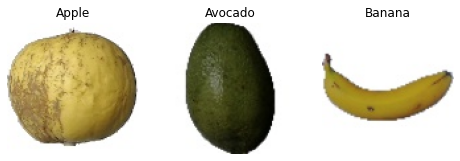

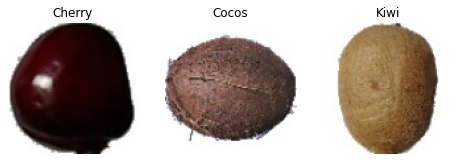

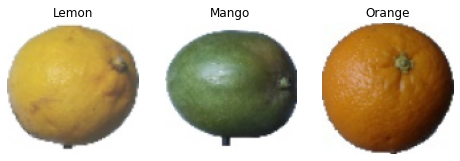

In [18]:
fruits_array_train=[]
for features,label in all_arrays:
    fruits_array_train.append(features)

location=[[1,500,1150],[1500,2000,2500],[3000,3500,4000]]
fruit_names=["Apple","Avocado","Banana","Cherry","Cocos","Kiwi","Lemon","Mango","Orange"]
a=0
b=1
c=2
for i,j,k in location:
    plt.subplots(figsize=(8,8))
    plt.subplot(1,3,1)
    plt.imshow(fruits_array_train[i])
    plt.title(fruit_names[a])
    plt.axis("off")
    plt.subplot(1,3,2)
    plt.imshow(fruits_array_train[j])
    plt.title(fruit_names[b])
    plt.axis("off")
    plt.subplot(1,3,3)
    plt.imshow(fruits_array_train[k])
    plt.title(fruit_names[c])
    plt.axis("off")
    a+=3
    b+=3
    c+=3

In [19]:
import random
random.shuffle(all_arrays)

X_train=[]
Y_train=[]
for features,label in all_arrays:
    X_train.append(features)
    Y_train.append(label)
X_train=np.array(X_train) #arraying

import random
random.shuffle(all_arrays2)

X_test=[]
Y_test=[]
for features,label in all_arrays2:
    X_test.append(features)
    Y_test.append(label)
X_test=np.array(X_test) #arraying

We created our X features and Y labels. Also we used shuffle function to mix our dataset.

In [20]:
#normalization and reshaping
X_train=X_train.reshape(-1,img_size,img_size,3)
X_train=X_train/255
X_test=X_test.reshape(-1,img_size,img_size,3)
X_test=X_test/255
print("shape of X_train= ",X_train.shape)
print("shape of X_test=  ",X_test.shape)

shape of X_train=  (4306, 100, 100, 3)
shape of X_test=   (1445, 100, 100, 3)


While reshaping we added RGB scale.



In [22]:
from tensorflow.keras.utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=9)
Y_test=to_categorical(Y_test,num_classes=9)


Using TensorFlow backend.
We converted our labels to one-hot-encoding values. 3 ----->(0,0,0,1,0,0,0,0,0,0) etc

In [23]:
Y_train.shape

(4306, 9)

In [24]:
X_train.shape

(4306, 100, 100, 3)

In [25]:
from sklearn.model_selection import  train_test_split
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

With train_test_split we separated our datas to train and validation datas.

In [27]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import ReduceLROnPlateau


model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9,activation="softmax"))
#defining optimizer
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
#compile the model
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

epochs=10
batch_size=18

We connected our labels-layers with keras library. With Dense we added hidden layers. We avoided overfitting thanks to Dropout. With relu function we don't have variance around zero.

Let's go with data augmentation. In this section we add different shapes of our images. We will use zooming,shifting,rotating,fliping methods in order to avoid overfitting.
For example we will add a image of banana with 5 degrees rotated.

In [28]:
datagen=ImageDataGenerator(featurewise_center=False, #set input mean to 0
                           samplewise_center=False,  #set each sample mean to 0
                           featurewise_std_normalization=False, #divide input datas to std
                           samplewise_std_normalization=False,  #divide each datas to own std
                           zca_whitening=False,  #dimension reduction
                           rotation_range=0.5,    #rotate 5 degree
                           zoom_range=0.5,        #zoom in-out 5%
                           width_shift_range=0.5, #shift 5%
                           height_shift_range=0.5,
                           horizontal_flip=False,  #randomly flip images
                           vertical_flip=False,
                           )
datagen.fit(x_train)

#model fitting
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )

Epoch 1/10
191/191 [==============================] - 38s 194ms/step - loss: 1.8436 - accuracy: 0.2963 - val_loss: 1.1344 - val_accuracy: 0.3213
Epoch 2/10
191/191 [==============================] - 32s 167ms/step - loss: 0.8732 - accuracy: 0.6182 - val_loss: 0.5639 - val_accuracy: 0.7842
Epoch 3/10
191/191 [==============================] - 32s 169ms/step - loss: 0.5425 - accuracy: 0.7764 - val_loss: 0.5124 - val_accuracy: 0.7436
Epoch 4/10
191/191 [==============================] - 32s 169ms/step - loss: 0.2929 - accuracy: 0.8876 - val_loss: 0.1245 - val_accuracy: 0.9733
Epoch 5/10
191/191 [==============================] - 32s 167ms/step - loss: 0.2013 - accuracy: 0.9311 - val_loss: 0.0889 - val_accuracy: 0.9768
Epoch 6/10
191/191 [==============================] - 32s 168ms/step - loss: 0.1796 - accuracy: 0.9340 - val_loss: 0.0708 - val_accuracy: 0.9872
Epoch 7/10
191/191 [==============================] - 33s 174ms/step - loss: 0.1379 - accuracy: 0.9492 - val_loss: 0.0686 - val_ac

After 15 iteration we have a high accuracy around 96%

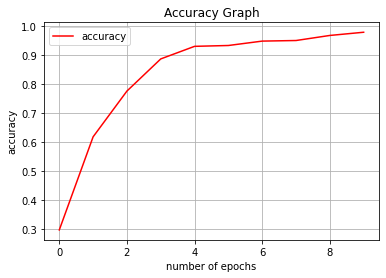

In [35]:
plt.plot(history.history["accuracy"],color="r",label="accuracy")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

In [39]:
import tensorflow

In [99]:
#PREDICTION CODE
img_url = "/content/6000200094504.jpeg"
#img_path = tf.keras.utils.get_file('14.jpg', origin=img_url)

img = tensorflow.keras.utils.load_img(
    img_url, target_size=(img_size, img_size)
)
img_array = tensorflow.keras.utils.img_to_array(img)
img_array = tensorflow.expand_dims(img_array, 0) # Create a batch

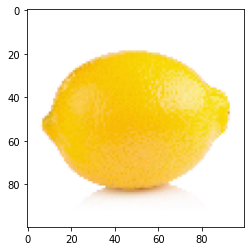

In [100]:
plt.imshow(img)
plt.show()

In [101]:
predictions = model.predict(img_array)
score = tensorflow.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} "
    .format(classes[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Lemon 
